In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cardio = pd.read_csv("~/Documents/Statistiks-and-R-programming/Mach_learn/HW1/cardio_train.csv", sep = ";")
cardio.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


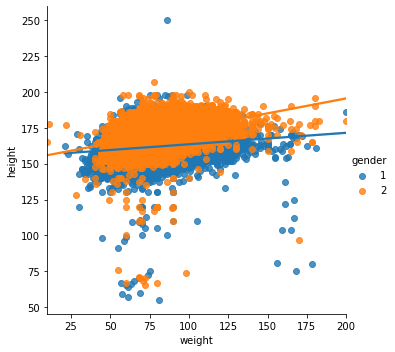

In [3]:
sns.lmplot(x = 'weight', y = 'height', hue = 'gender', data = cardio)

In [4]:
gender_group = cardio.groupby('gender', as_index = False).aggregate({'id':'count'})
gender_group = gender_group.rename(columns = {'id':'number_of_persons'})
gender_group.loc[gender_group.gender == 1, 'gender'] = 'female'
gender_group.loc[gender_group.gender == 2, 'gender'] = 'male'
gender_group

,gender,number_of_persons
0,female,45530
1,male,24470


In [5]:
cardio["BMI"] = cardio.weight/((cardio.height)^2)
cardio.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,0.364706
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,0.537975
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,0.383234
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,0.479532
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,0.354430


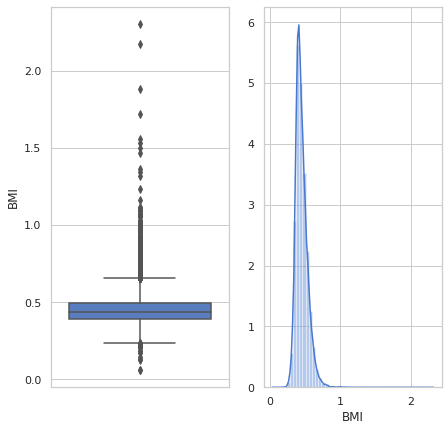

In [6]:
sns.set(palette="muted", color_codes=True)
sns.set_style("whitegrid")
f, axes = plt.subplots(1, 2, figsize=(7, 7))
sns.boxplot(y ='BMI', data = cardio, orient = 'v', ax = axes[0])
sns.distplot(cardio.BMI, ax = axes[1])

In [7]:
cardio_high_dia_pr = cardio.query("ap_lo > ap_hi")
print(round((len(cardio_high_dia_pr)/len(cardio.index))*100, 2),'%')

1.76 %


In [37]:
cardio['age_year'] = round(cardio.age/365, 0)
age_cat = []
for age in cardio.age_year:
    if age < 40:
        age = 'age less 40'
    else:
        if ((age >=40) & (age < 50)):
            age = 'age more 40 and less 50 '
        else:
            if ((age >=50) & (age < 60)):
                age = 'age more 50 less 60'
            else:
                if age >= 60:
                    age = 'age more 60'
    age_cat.append(age)
        

cardio["age_cat"]=age_cat
cardio.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,age_year,age_cat,bmi_cat
50798,72488,14338,1,166,59.0,100,60,1,1,0,0,1,0,0.359756,39.0,age less 40,low
67883,96949,14321,2,173,81.0,130,80,1,1,1,0,1,0,0.462857,39.0,age less 40,low
5229,7442,14325,1,158,71.0,115,80,1,1,0,0,1,0,0.455128,39.0,age less 40,low
53916,76915,14372,2,176,100.0,127,86,1,1,0,0,0,0,0.561798,39.0,age less 40,normal
31728,45308,14354,1,175,70.0,110,80,1,1,0,0,1,0,0.404624,39.0,age less 40,low


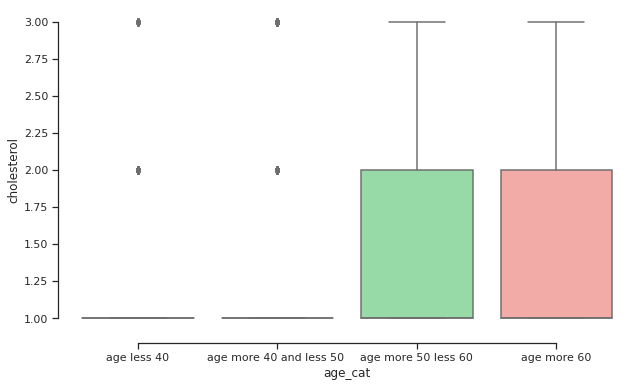

In [39]:
f= plt.figure(figsize = (10,6))
sns.set(style="ticks", palette="pastel")
sns.boxplot(x = 'age_cat', y = 'cholesterol', data = cardio)
sns.despine(offset=10, trim=True)

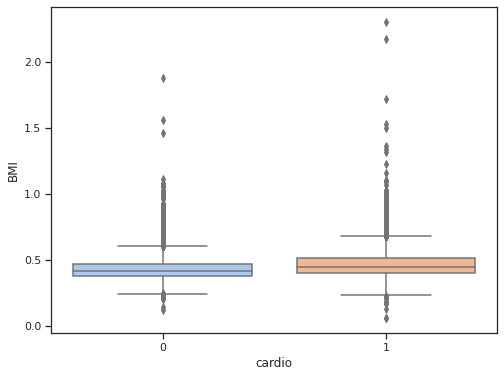

In [54]:
f= plt.figure(figsize = (8,6))
sns.set(palette="pastel",style="ticks", color_codes=True)
sns.boxplot(x = 'cardio', y = 'BMI', data = cardio)